<a href="https://colab.research.google.com/github/bhuvan-j/Data-Science/blob/main/Pokemon_Image_classification_using_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading and Processing Data

In [234]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [235]:
p=Path("/content/drive/MyDrive/Colab Notebooks/Pokemon-Dataset")

dirs = p.glob("*") #glob helps in iterating over the directories.
#print(dirs)

image_data=[]
labels=[]

#optional
image_paths=[]

labels_dict={
    "Pikachu" : 0,
    "Bulbasaur" : 1,
    "Meowth" : 2
}

label2pokemon={
    0:"Pikachu",
    1:"Bulbasaur",
    2:"Meowth"
}

for folder_dir in dirs:
  label= str(folder_dir).split('/')[-1]

  cnt=0
  print(folder_dir)

  #iterate over folder_dir and pick all images of the pokemon
  for img_path in folder_dir.glob("*.jpg"):
    image_paths.append(img_path)
    img = image.load_img(img_path,target_size=(40,40)) #loading the image and making the size of all the images same i.e 40x40
    img_array= image.img_to_array(img) #converting image to array
    image_data.append(img_array)

    labels.append(labels_dict[label])
    cnt+=1
  print(label,": ",cnt)





/content/drive/MyDrive/Colab Notebooks/Pokemon-Dataset/Bulbasaur
Bulbasaur :  21
/content/drive/MyDrive/Colab Notebooks/Pokemon-Dataset/Meowth
Meowth :  26
/content/drive/MyDrive/Colab Notebooks/Pokemon-Dataset/Pikachu
Pikachu :  35


#Visualisation

In [236]:
import numpy as np

In [237]:
print(len(image_data))
print(len(labels))

82
82


In [238]:
 print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [239]:
X = np.array(image_data)
Y = np.array(labels)

In [240]:
print(X.shape)  # 82 images , h= 100px , w= 100px , channels= 3 ( red, geen, blue)
print(Y.shape)

(82, 40, 40, 3)
(82,)


In [241]:

#shuffle our data
import random
random.seed(10)

#combined = list(zip(X,Y)) #zip x and y values together so that they remain together
#random.shuffle(combined) #shuffle both x and y together
#X[:],Y[:] = zip(*combined) #unzip the data

#method 2 of shufflinf using sklearn


from sklearn.utils import shuffle
X,Y= shuffle(X,Y,random_state=2)

#normalisation
X=X/255.0

In [242]:
#Draw some of the pokemons
def drawimg(img,label):
  plt.imshow(img)
  plt.axis("off")
  plt.style.use("seaborn")
  plt.title(label2pokemon[label])
  plt.show()

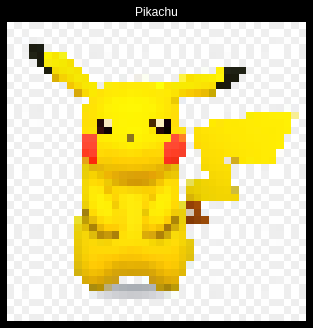

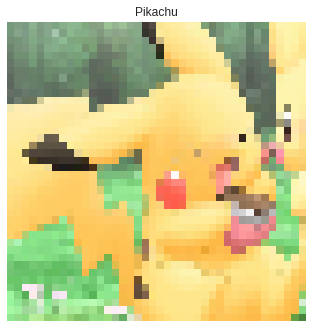

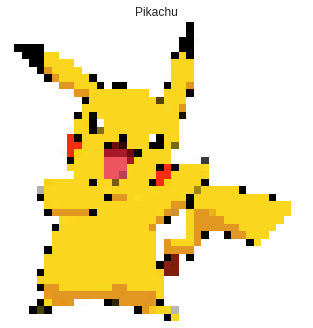

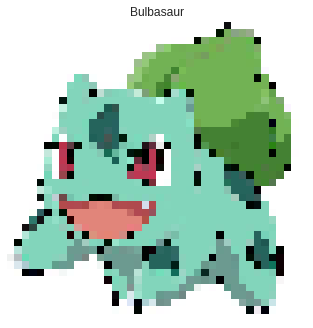

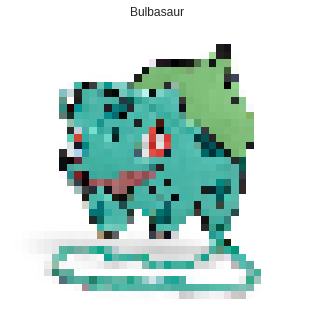

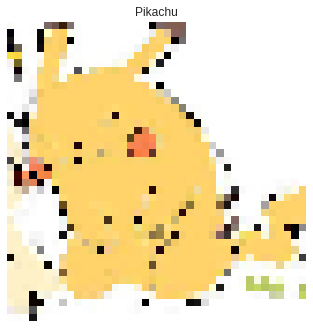

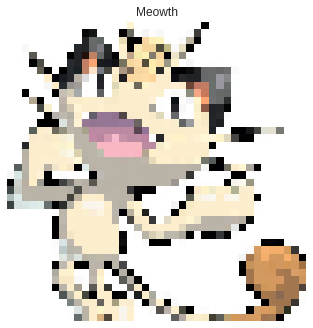

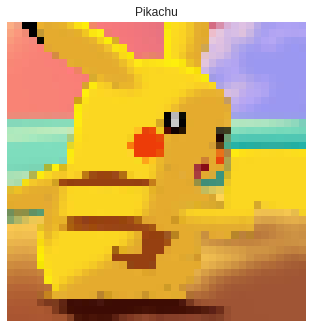

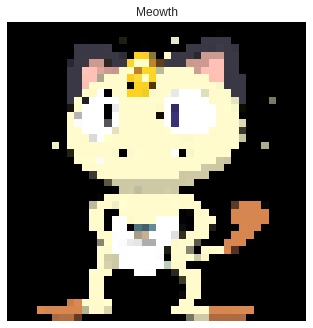

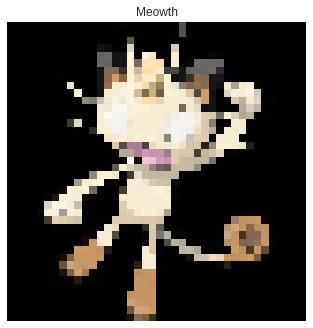

In [243]:
for i in range(10):
  r= np.random.randint(82)
  drawimg(X[r],Y[r])

## Creating training and testing set

In [244]:
split = int(X.shape[0]*0.70)

X_ = X[:split,:]
Y_ = Y[:split]

XTest = X[split:,:]
YTest = Y[split:]

print(X_.shape,Y_.shape)
print(XTest.shape,YTest.shape)

(57, 40, 40, 3) (57,)
(25, 40, 40, 3) (25,)


In [245]:
def softmax(a): # e^a(i)/ summation of e^a(i)
  e_pa=np.exp(a) #vector if 'a' is a vector.
  ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
  return ans


class NeuralNetwork:

  def __init__(self,input_size,layers,output_size):
    np.random.seed(0) #to retain the same initialisation everytime for different inputs
    model={} #dictionary

    model['W1'] = np.random.randn(input_size,layers[0]) 
    #randomly initialises from normal distribution
    # and creates a matrix of size input_size x layer[0] i.e 3 x 4
    model['b1'] =np.zeros((1,layers[0])) #bias

    model['W2'] = np.random.randn(layers[0],layers[1]) 
    model['b2'] =np.zeros((1,layers[1])) #bias

    model['W3'] = np.random.randn(layers[1],output_size) 
    model['b3'] =np.zeros((1,output_size)) #bias

    self.model=model



  #FORWARD PROPOGATION
  def forward(self,x): 

    W1,W2,W3  = self.model['W1'],self.model['W2'],self.model['W3']
    b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

    z1= np.dot(x,W1)+b1
    a1= np.tanh(z1) #activation function. we can use either sigmoid or tanh or reLu

    z2=np.dot(a1,W2)+b2
    a2=np.tanh(z2)

    z3=np.dot(a2,W3)+b3
    y_ = softmax(z3) #how probable is each answer between 0 and 1

    self.activation_outputs=(a1,a2,y_)
    return y_

  #BACKWARD PROPOGATION!
  def backward(self,x,y,learning_rate=0.001):
    W1,W2,W3  = self.model['W1'],self.model['W2'],self.model['W3']
    b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
    m=x.shape[0]
    a1,a2,y_ = self.activation_outputs

    delta3= y_-y
    dw3 = np.dot(a2.T,delta3)
    db3= np.sum(delta3,axis=0)

    delta2= (1-np.square(a2)) * np.dot(delta3,W3.T)
    #derivative of tanh = 1 - (tanh)^2.....a2 is 
    dw2= np.dot(a1.T,delta2)
    db2=np.sum(delta2,axis=0)

    delta1 = (1-np.square(a1)) * np.dot(delta2,W2.T)
    dw1= np.dot(x.T,delta1)
    db1=np.sum(delta1,axis=0)

    #Update the model parameters using Gradient Descent
    self.model["W1"] -= learning_rate*dw1
    self.model["b1"] -= learning_rate*db1

    self.model["W2"] -= learning_rate*dw2
    self.model["b2"] -= learning_rate*db2

    self.model["W3"] -= learning_rate*dw3
    self.model["b3"] -= learning_rate*db3 
    
    # :)

  
  def predict(self,x):
    y_out=self.forward(x)

    return np.argmax(y_out,axis=1)
  
  def summary(self):
    W1,W2,W3  = self.model['W1'],self.model['W2'],self.model['W3']
    a1,a2,y_ = self.activation_outputs

    print("W1 ",W1.shape)
    print("A1 ",a1.shape)

    print("W2 ",W2.shape)
    print("A2 ",a2.shape)

    print("W3 ",W3.shape)
    print("Y_ ",y_.shape)


In [246]:
def one_hot(y,depth):
  y_oht=np.zeros((y.shape[0],depth))
  y_oht[np.arange(y.shape[0]),y]=1
  return y_oht

def loss(y_oht,p): #y_oht= one hot vectors of each example , p is the predicted probability
  #we will use categorical cross entropy loss, as MSE loss is non-convex(has multiple minimas)
  l = -np.mean(y_oht*np.log(p))
  return l

In [247]:
def train(X,Y,model,epochs,learning_rate,logs=True):
  training_loss=[]

  classes=3
  Y_OHT= one_hot(Y,classes)

  for ix in range(epochs):

    Y_=model.forward(X)
    l= loss(Y_OHT,Y_)
    training_loss.append(l)
    model.backward(X,Y_OHT,learning_rate)


    if(logs):
      print("Epoch %d Loss %.4f"%(ix,l))

  return training_loss

In [248]:
model = NeuralNetwork(input_size=4800,layers=[100,50],output_size=3)
# 4800 input features( 40 x 40 x 3)
# 2 hidden layers with 100 and 50 neurons respectively
#1 output layer with 3 classes ( pikachu, meowth, bulbasaur)

In [249]:
X=X.reshape(X.shape[0],-1) #flattening the image to a linear array to pass it through the model

In [250]:
X.shape # 82 images of linear size 4800

(82, 4800)

In [251]:
XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(25, 4800)


In [252]:
l=train(X,Y,model,500,0.0002,logs=False)

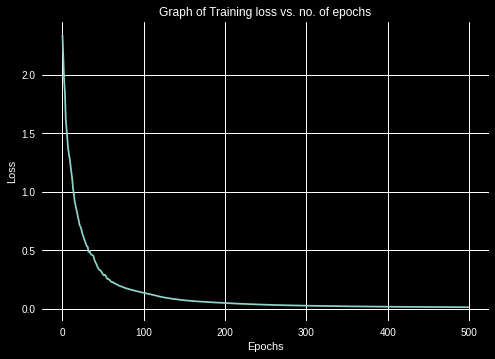

In [253]:
plt.style.use("dark_background")
plt.plot(l)
plt.title("Graph of Training loss vs. no. of epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [254]:
def getAccuracy(X,Y,model):
  outputs = model.predict(X)
  acc= np.sum(Y==outputs)/Y.shape[0]
  return acc

print("Training Accuracy %.4f"%(getAccuracy(X_.reshape(X_.shape[0],-1),Y_,model)))
print("Testing Data accuracy %.4f"%(getAccuracy(XTest.reshape(XTest.shape[0],-1),YTest,model)))

Training Accuracy 1.0000
Testing Data accuracy 1.0000


#Visualising MisClassifications

In [255]:
from sklearn.metrics import classification_report,confusion_matrix

In [256]:
#written by prateek bhaiya
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [257]:
outputs =model.predict(X)
cnf_matrix = confusion_matrix(outputs,Y)
print(cnf_matrix)

[[35  0  0]
 [ 0 21  0]
 [ 0  0 26]]


Confusion matrix, without normalization
[[35  0  0]
 [ 0 21  0]
 [ 0  0 26]]


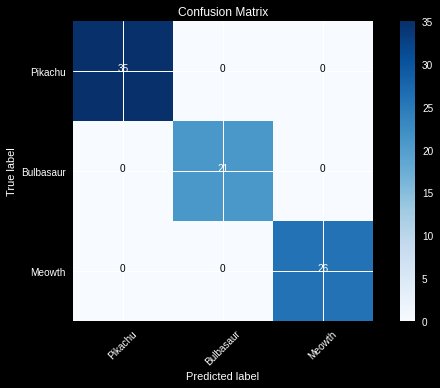

In [258]:
plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur","Meowth"],title="Confusion Matrix")

In [259]:
print(classification_report(outputs,Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        26

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



In [260]:
# PRECISION is for example the model classified that there are 40 pikachus but actually there are 30 pikachys. so precision is 30/40
# recall is how many pikachu are selected   
# f1 score is harmonic mean of precision and recall

In [261]:
test_outputs = model.predict(XTest)
print(classification_report(test_outputs,YTest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [262]:
cnf_matrix = confusion_matrix(test_outputs,YTest)
print(cnf_matrix)

[[ 9  0  0]
 [ 0  6  0]
 [ 0  0 10]]


Confusion matrix, without normalization
[[ 9  0  0]
 [ 0  6  0]
 [ 0  0 10]]


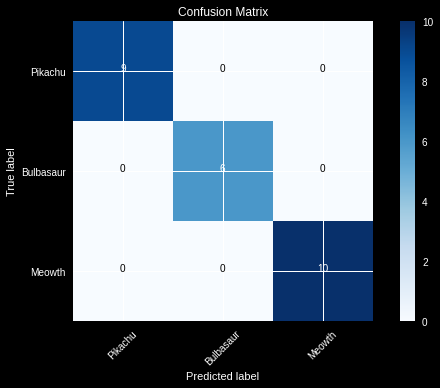

In [263]:
plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur","Meowth"],title="Confusion Matrix")

In [264]:
for i in range(Y.shape[0]):
  if Y[i]!=outputs[i]:
    drawimg(X[i].reshape(40,40,3),Y[i])
    print(" Prediction %d %s"%(i,label2pokemon[outputs[i]]))